# Task_3 (IRIS FLOWER CLASSIFICATION)

**Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

**Load Data**

In [2]:
data=pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

**Understand Data**

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**check duplicated Values**

In [7]:
data.duplicated().sum()

3

**Delete duplicated Values**

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(147, 5)

**Check Null Values**

In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
#show number of zeros in each column
for column in data.columns:
    count=(data[column]==0).sum()
    print('Count of zeros in column ',column, ' is :', count)

Count of zeros in column  sepal_length  is : 0
Count of zeros in column  sepal_width  is : 0
Count of zeros in column  petal_length  is : 0
Count of zeros in column  petal_width  is : 0
Count of zeros in column  species  is : 0


<Axes: >

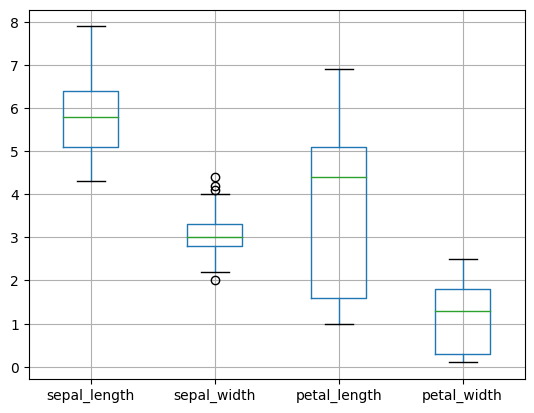

In [12]:
data.boxplot()

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

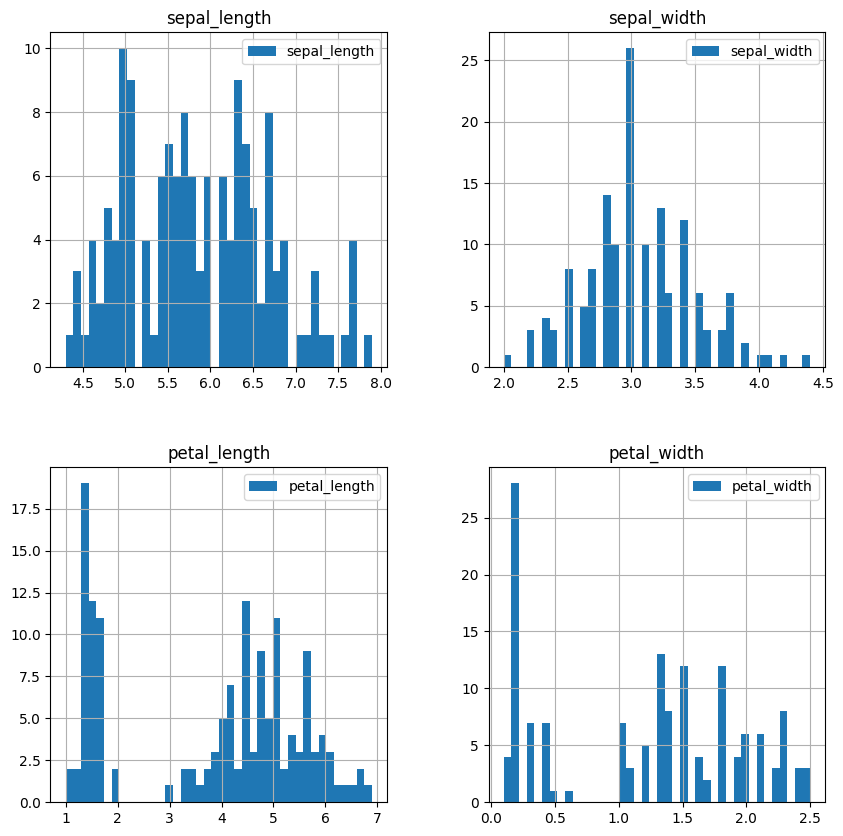

In [13]:
data.hist(bins= 40, figsize=(10,10),legend=True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


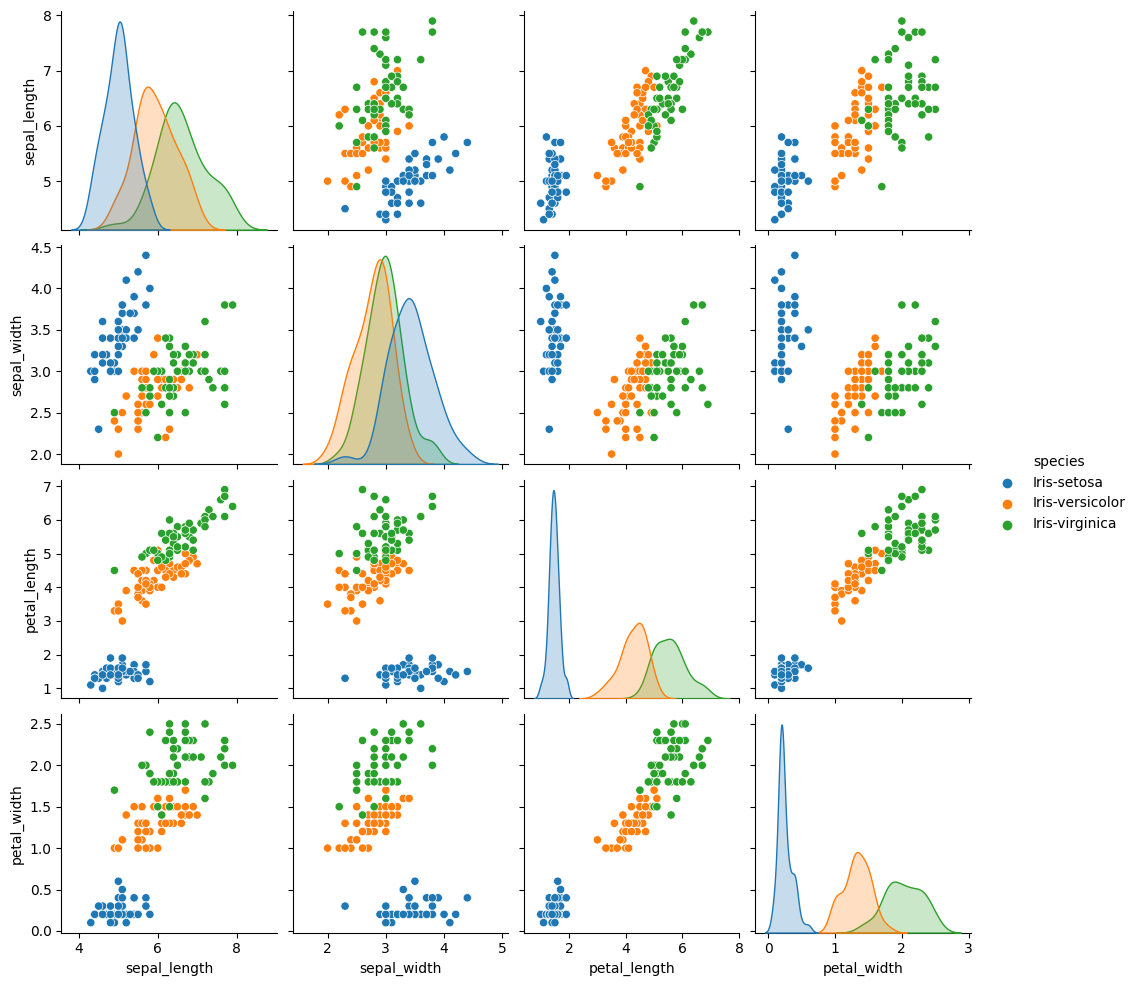

In [14]:
sns.pairplot(data = data, hue = 'species')
plt.show()

<Axes: >

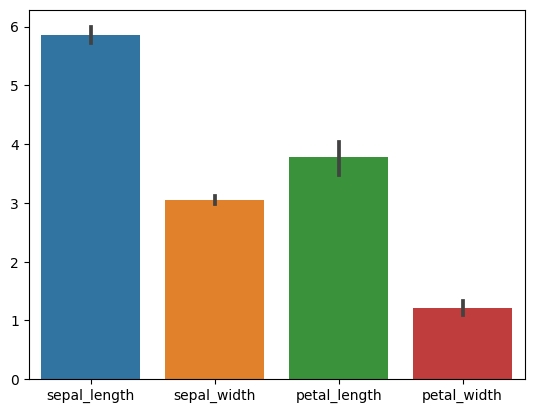

In [15]:
sns.barplot(data=data)

In [16]:
fig = px.histogram(data, x="species", y="species", histfunc="count", nbins=8, text_auto=True)
fig.show()

**Transform species column to numerical values**

In [17]:
encode=preprocessing.LabelEncoder()
data['species']=encode.fit_transform(data['species'])

**Show Relationship between features**

<Axes: >

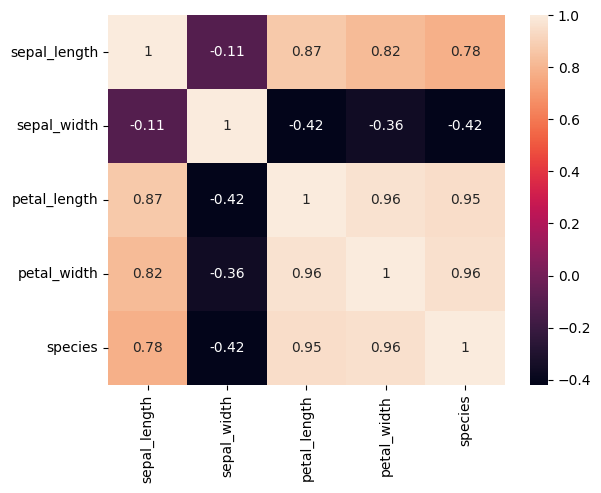

In [18]:
sns.heatmap(data.corr(),annot=True)

**show features that have high postive correlation**

<Axes: >

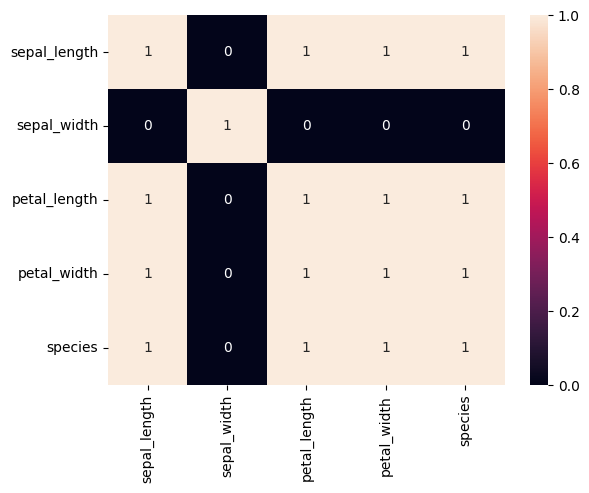

In [19]:
sns.heatmap(data.corr()>0.5 ,annot=True)

**Data Visualization**

Text(0, 0.5, 'petal_width')

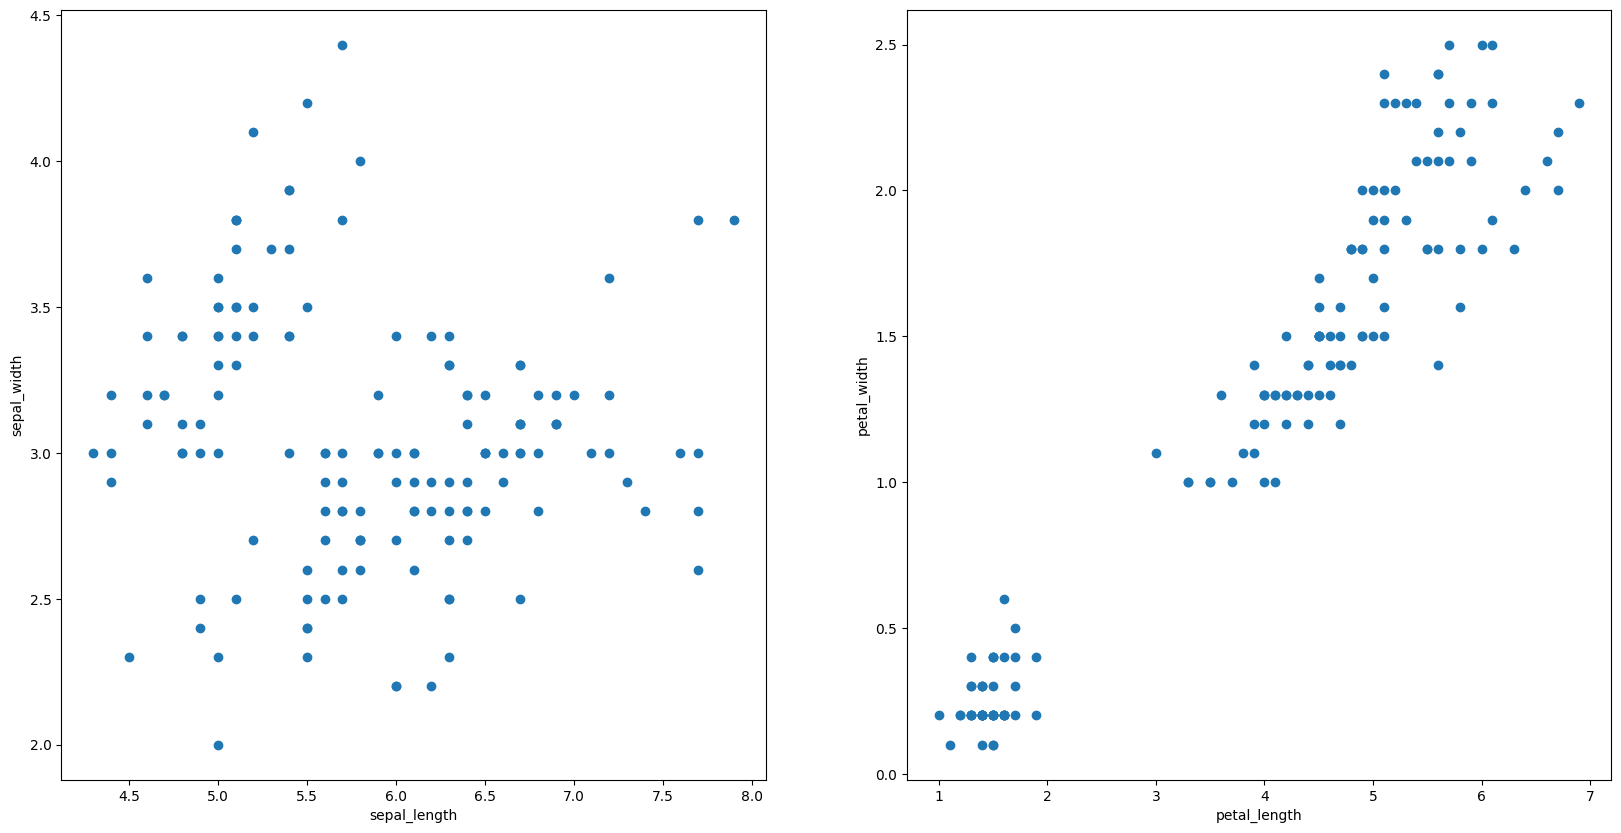

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.subplot(1, 2, 2)
plt.scatter(data['petal_length'], data['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [21]:
fig = px.histogram(data, x="sepal_length", color="species").update_xaxes(categoryorder='total descending')
fig.show()

In [22]:
fig = px.bar(data, x="petal_length", y="species", color="species", title="Long-Form Input")
fig.show()

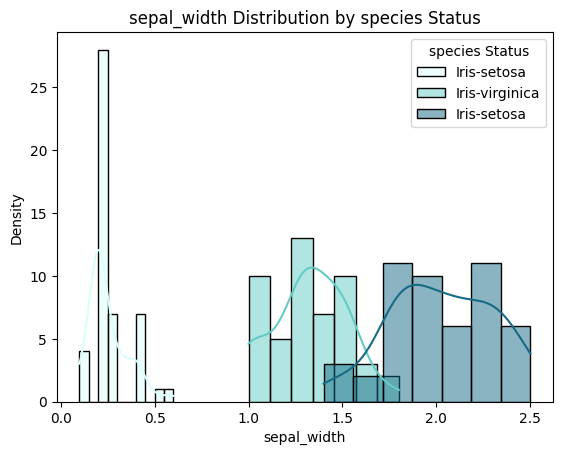

In [23]:
sns.histplot(data=data[data['species'] == 0], x='petal_width', kde=True, color='#DAFFFB', label='Iris-setosa')
sns.histplot(data=data[data['species']== 1], x='petal_width', kde=True, color='#64CCC5', label='Iris-virginica')
sns.histplot(data=data[data['species']== 2], x='petal_width', kde=True, color='#176B87', label='Iris-setosa')
plt.xlabel('sepal_width')
plt.ylabel('Density')
plt.title('sepal_width Distribution by species Status')

# Add a legend
plt.legend(title='species Status')

plt.show()

**Feature Selection**

In [24]:
X=data.drop(['species'],axis=1)
Y=data.iloc[:,4]

**Split data**

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [26]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("Y_train shape",Y_train.shape)
print("Y_test shape",Y_test.shape)

X_train shape (117, 4)
X_test shape (30, 4)
Y_train shape (117,)
Y_test shape (30,)


**Build Models**

In [27]:
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train,Y_train)
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train,Y_train)

In [28]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [29]:
poly_accuracy = accuracy_score(Y_test, poly_pred)
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))

Accuracy (Polynomial Kernel):  100.00


<Axes: >

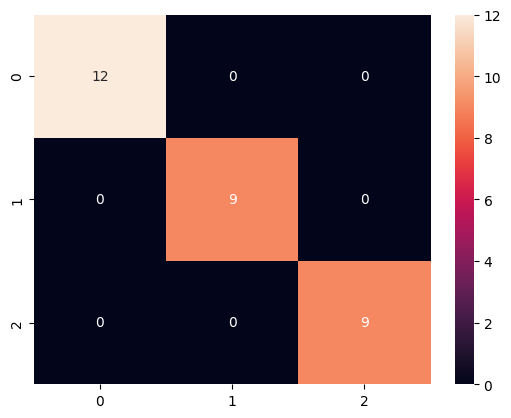

In [30]:
CM_ploy = confusion_matrix(Y_test, poly_pred )
# Heatmap of Confusion matrix
sns.heatmap(CM_ploy, annot=True)

In [31]:
rbf_accuracy = accuracy_score(Y_test, rbf_pred)
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))

Accuracy (RBF Kernel):  100.00


<Axes: >

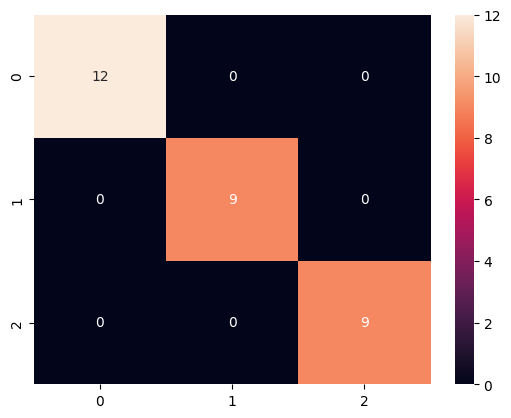

In [32]:
CM_rbf = confusion_matrix(Y_test, rbf_pred )
# Heatmap of Confusion matrix
sns.heatmap(CM_rbf, annot=True)

In [33]:
LogisticRegression_Model=linear_model.LogisticRegression()
LogisticRegression_Model.fit(X_train,Y_train)

LogisticRegression()

In [34]:
LR_predicted = LogisticRegression_Model.predict(X_test)
LR_accuracy = accuracy_score(Y_test, LR_predicted)
print('Accuracy (LogisticRegression): ', "%.2f" % (LR_accuracy*100))


Accuracy (LogisticRegression):  100.00


<Axes: >

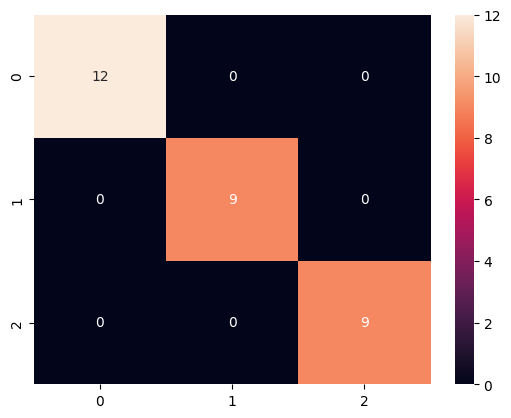

In [35]:
CM_LR = confusion_matrix(Y_test, LR_predicted )
# Heatmap of Confusion matrix
sns.heatmap(CM_LR, annot=True)